In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [3]:
def f(x):
    return np.abs(x)

In [4]:
def get_points(a, b, n, mode):
    if mode == 'uniform':
        points = np.linspace(a, b, n)
    elif mode == 'random':
        points = np.sort(np.random.rand(n) * (b - a) + a)
    elif mode == 'chebyshev':
        points = (np.polynomial.chebyshev.chebpts1(n) + 1) / 2 * (b - a) + a
    else:
        print(f'incorrect mode {mode}')
        points = 0
    return points

In [78]:
def plot(f1, f2, a, b, name):
    #a = a - 1
    #b = b + 1
    plot_points = get_points(a, b, int(100 * (b - a)), 'uniform')
    plt.plot(plot_points, f1(plot_points), label='interpolation')
    plt.plot(plot_points, f2(plot_points), label='function')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.show()

In [84]:
def vander_interpol(n, a, b, mode, verbose=False):
    points = get_points(a, b, n + 1, mode)
    matrix = np.vander(points, increasing=True)
    fx = f(points)
    coefs = np.linalg.solve(matrix, fx)
    poly = Polynomial(coefs)
    if verbose:
        print(poly)
    plot(poly, f, a, b, 'Vandermonde ' + mode)

6.29614806e-15 + (9.67077537e-16) x + 6.45634921 x**2 -
(3.21851249e-13) x**3 - 41.2808642 x**4 + (2.11812425e-12) x**5 +
128.39988426 x**6 - (3.74432278e-12) x**7 - 167.92741402 x**8 +
(1.9470827e-12) x**9 + 75.35204475 x**10


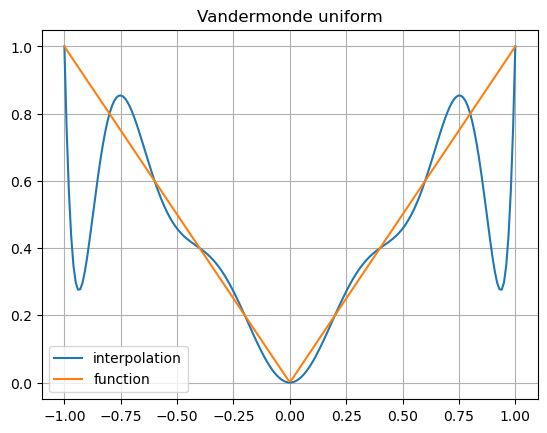

-4.05359173e-15 - (1.21486206e-14) x + 4.80651079 x**2 +
(2.68382216e-13) x**3 - 18.73894592 x**4 - (1.06673403e-12) x**5 +
39.50721068 x**6 + (1.47286312e-12) x**7 - 38.22893863 x**8 -
(6.63389134e-13) x**9 + 13.66697858 x**10


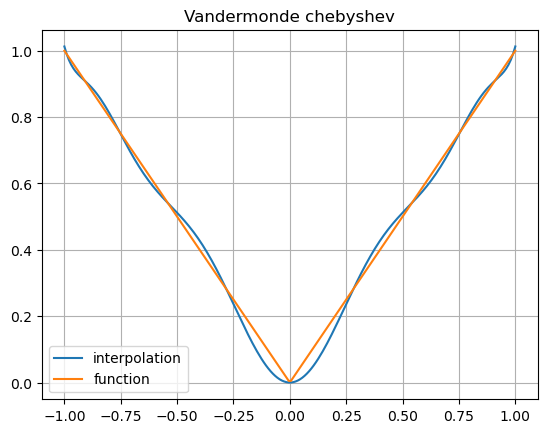

In [128]:
vander_interpol(10, -1, 1, 'uniform', True)
vander_interpol(10, -1, 1, 'chebyshev', True)

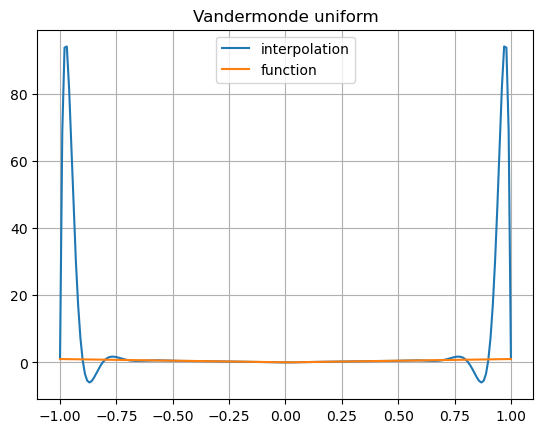

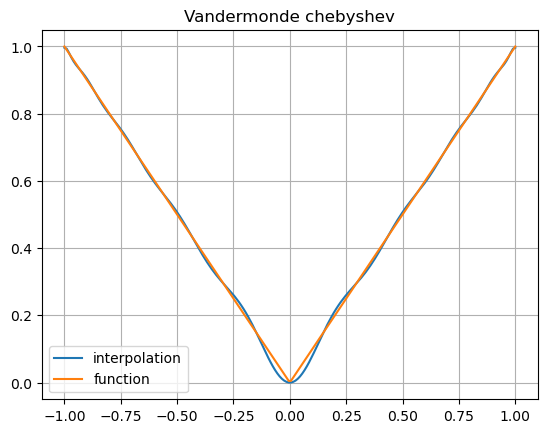

In [129]:
vander_interpol(20, -1, 1, 'uniform')
vander_interpol(20, -1, 1, 'chebyshev')

In [93]:
# from 01_orthogonal_polynomials
def deg_integral(coef, n, a, b):
    '''integral from a to b of coef * x**n'''
    return (b**(n + 1) - a**(n + 1)) / (n + 1) * coef

def scalar_prod(p, q, a, b):
    res = 0
    for i in range(len(p)):
        for j in range(len(q)):
            res += deg_integral(p[i] * q[j], i + j, a, b)
    return res

def gramm_matrix(n, a, b):
    g = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            g[i, j] = deg_integral(1, i + j, a, b)
    return g

def orthogonal_polynomials_cholesky(n, a, b, verbose=False):
    polys = []
    S = np.linalg.inv(np.linalg.cholesky(gramm_matrix(n, a, b)))
    for i in range(n):
        coeffs = S[i][:i+1]
        polys.append(Polynomial(coeffs))
        if verbose:
            print(polys[i])

    if verbose:
        for i in range(n):
            for j in range(i + 1, n):
                print(f'{i}x{j}: ', scalar_prod(polys[i], polys[j], a, b))
    return polys

In [94]:
for i in orthogonal_polynomials_cholesky(5, 0, 1):
    print(i)

1.0
-1.73205081 + 3.46410162 x
2.23606798 - 13.41640786 x + 13.41640786 x**2
-2.64575131 + 31.74901573 x - 79.37253933 x**2 + 52.91502622 x**3
3.0 - 60.0 x + 270.0 x**2 - 420.0 x**3 + 210.0 x**4


In [119]:
def orthogonal_interpol(n, a, b, mode, verbose=False):
    n = n + 1
    points = get_points(a, b, n, mode)
    polys = orthogonal_polynomials_cholesky(n, a, b)
    matrix = np.zeros((n, n))
    fx = f(points)
    for i in range(n):
        for j in range(n):
            matrix[i][j] = polys[i](points[j])
    matrix = matrix.T
    coefs = np.linalg.solve(matrix, fx)
    res = Polynomial([0])
    for i, c in enumerate(coefs):
        res += c * polys[i]
    if verbose:
        print(res)
    plot(res, f, a, b, 'Orthogonal ' + mode)

-1.11022302e-16 - (4.04938723e-16) x + 6.45634921 x**2 +
(1.6467356e-15) x**3 - 41.2808642 x**4 + (1.92454405e-14) x**5 +
128.39988426 x**6 - (5.58024871e-14) x**7 - 167.92741402 x**8 +
(3.53152498e-14) x**9 + 75.35204475 x**10


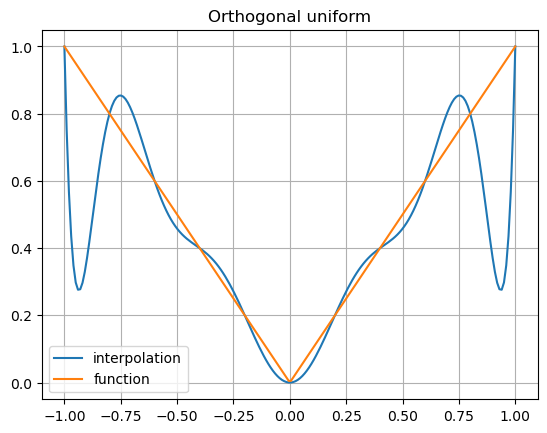

-1.04083409e-17 - (9.14722947e-16) x + 4.80651079 x**2 +
(1.58950463e-14) x**3 - 18.73894592 x**4 - (7.53235704e-14) x**5 +
39.50721068 x**6 + (1.2480094e-13) x**7 - 38.22893863 x**8 -
(6.52024079e-14) x**9 + 13.66697858 x**10


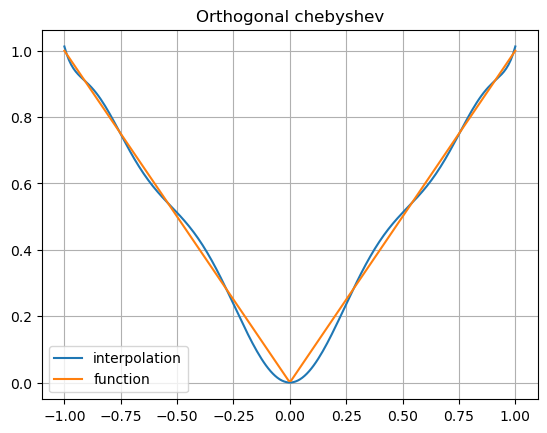

In [120]:
orthogonal_interpol(10, -1, 1, 'uniform', True)
orthogonal_interpol(10, -1, 1, 'chebyshev', True)

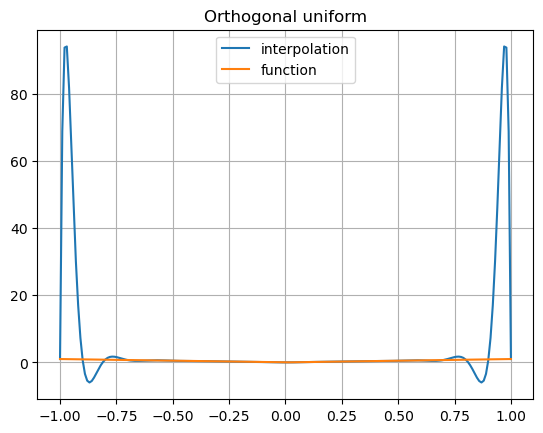

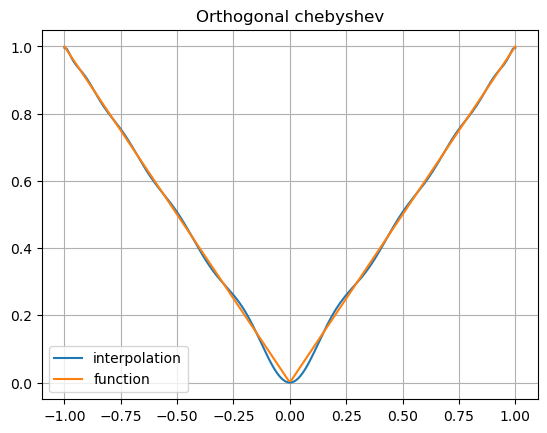

In [121]:
orthogonal_interpol(20, -1, 1, 'uniform')
orthogonal_interpol(20, -1, 1, 'chebyshev')

In [137]:
def lagrange_interpol(n, a, b, mode, verbose=False):
    points = get_points(a, b, n + 1, mode)
    p = Polynomial.fromroots(points)
    w = p.deriv()
    l = Polynomial([0])
    for i, x in enumerate(points):
        new_points = list(points[:i]) + list(points[i+1:])
        l_i = Polynomial.fromroots(new_points) * f(x) / w(x)
        l += l_i
    if verbose:
        print(l)
    plot(l, f, a, b, 'Lagrange ' + mode)

0.0 - (6.30571984e-16) x + 6.45634921 x**2 + (1.01030295e-14) x**3 -
41.2808642 x**4 - (6.63913369e-14) x**5 + 128.39988426 x**6 +
(1.19904087e-13) x**7 - 167.92741402 x**8 - (4.04121181e-14) x**9 +
75.35204475 x**10


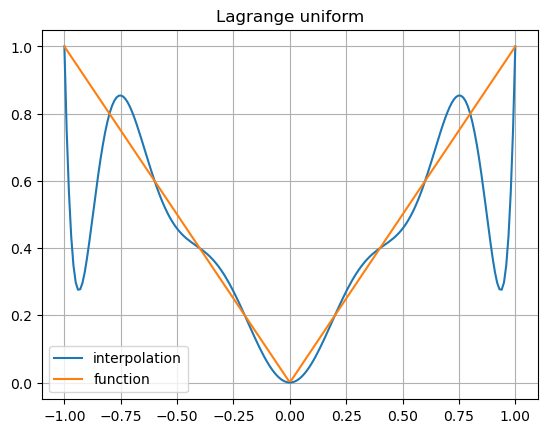

0.0 - (4.47142323e-14) x + 4.80651079 x**2 + (8.30446822e-13) x**3 -
18.73894592 x**4 - (3.91864319e-12) x**5 + 39.50721068 x**6 +
(6.44462261e-12) x**7 - 38.22893863 x**8 - (3.38573614e-12) x**9 +
13.66697858 x**10


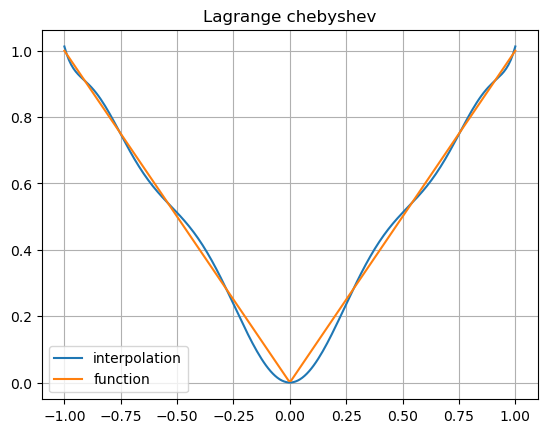

In [138]:
lagrange_interpol(10, -1, 1, 'uniform', True)
lagrange_interpol(10, -1, 1, 'chebyshev', True)

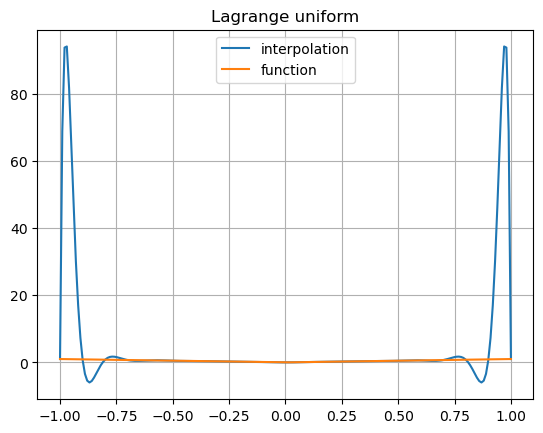

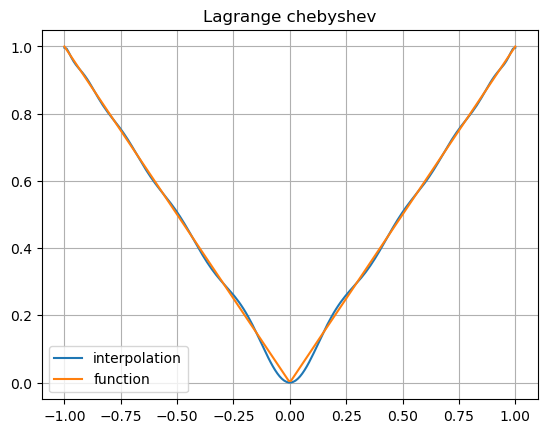

In [139]:
lagrange_interpol(20, -1, 1, 'uniform')
lagrange_interpol(20, -1, 1, 'chebyshev')